# 2. Segundo Dataset PAMAP

In [10]:
import pandas as pd
import os

In [12]:
pd.set_option("display.float_format", "{:.3f}".format)

In [14]:
from abc import ABC, abstractmethod

class AbstractDataLoader(ABC):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        self.src_path = src_path
        self.keys = keys
        self.file_extension = file_extension
        self.delimiter = delimiter     
        
    @abstractmethod
    def load_data(self):
        pass

    @abstractmethod
    def _is_valid_extension(self, file):
        pass

In [16]:
class DataLoader(AbstractDataLoader):
    def __init__(self, src_path:str, keys:list, file_extension:str, delimiter:str):
        super().__init__(src_path, keys, file_extension, delimiter)
        
    
    def load_data(self):
        dataframes = []
        for file in os.listdir(self.src_path):
            if self._is_valid_extension(file):  
                df = pd.read_csv(os.path.join(self.src_path, file), delimiter=self.delimiter, names=self.keys)
                df['subject_id'] = self._get_subject_id(file)
                dataframes.append(df)
        final_df = pd.concat(dataframes, ignore_index=True)
        return final_df

                
    def _is_valid_extension(self, file):
        return file.endswith(self.file_extension)

    def _get_subject_id(self, file):
        return file.split('.')[0]

In [18]:
src = "datasets/2_PAMAP2/PAMAP2_Dataset/Protocol/"
keys = [
    "timestamp",
    "activityID",
    "heart_rate_bpm",
    # IMU Hand (columns 4–20)
    "IMU_Hand_temperature",
    "IMU_Hand_acceleration_16g_x",
    "IMU_Hand_acceleration_16g_y",
    "IMU_Hand_acceleration_16g_z",
    "IMU_Hand_acceleration_6g_x",
    "IMU_Hand_acceleration_6g_y",
    "IMU_Hand_acceleration_6g_z",
    "IMU_Hand_gyroscope_x",
    "IMU_Hand_gyroscope_y",
    "IMU_Hand_gyroscope_z",
    "IMU_Hand_magnetometer_x",
    "IMU_Hand_magnetometer_y",
    "IMU_Hand_magnetometer_z",
    "IMU_Hand_orientation_1",
    "IMU_Hand_orientation_2",
    "IMU_Hand_orientation_3",
    "IMU_Hand_orientation_4",
    # IMU Chest (columns 21–37)
    "IMU_Chest_temperature",
    "IMU_Chest_acceleration_16g_x",
    "IMU_Chest_acceleration_16g_y",
    "IMU_Chest_acceleration_16g_z",
    "IMU_Chest_acceleration_6g_x",
    "IMU_Chest_acceleration_6g_y",
    "IMU_Chest_acceleration_6g_z",
    "IMU_Chest_gyroscope_x",
    "IMU_Chest_gyroscope_y",
    "IMU_Chest_gyroscope_z",
    "IMU_Chest_magnetometer_x",
    "IMU_Chest_magnetometer_y",
    "IMU_Chest_magnetometer_z",
    "IMU_Chest_orientation_1",
    "IMU_Chest_orientation_2",
    "IMU_Chest_orientation_3",
    "IMU_Chest_orientation_4",
    # IMU Ankle (columns 38–54)
    "IMU_Ankle_temperature",
    "IMU_Ankle_acceleration_16g_x",
    "IMU_Ankle_acceleration_16g_y",
    "IMU_Ankle_acceleration_16g_z",
    "IMU_Ankle_acceleration_6g_x",
    "IMU_Ankle_acceleration_6g_y",
    "IMU_Ankle_acceleration_6g_z",
    "IMU_Ankle_gyroscope_x",
    "IMU_Ankle_gyroscope_y",
    "IMU_Ankle_gyroscope_z",
    "IMU_Ankle_magnetometer_x",
    "IMU_Ankle_magnetometer_y",
    "IMU_Ankle_magnetometer_z",
    "IMU_Ankle_orientation_1",
    "IMU_Ankle_orientation_2",
    "IMU_Ankle_orientation_3",
    "IMU_Ankle_orientation_4"
]

file_extension = '.dat'
delimiter = r'\s+'
data_loader_pamap = DataLoader(src, keys, file_extension, delimiter)
pamap_data = data_loader_pamap.load_data()

pamap_data.shape

(2872533, 55)

Podemos observar que el dataset consta de:

1. **Características**: 55
2. **Ejemplos**: 2,872,533

In [20]:
pamap_data.head()

,timestamp,activityID,heart_rate_bpm,IMU_Hand_temperature,IMU_Hand_acceleration_16g_x,IMU_Hand_acceleration_16g_y,IMU_Hand_acceleration_16g_z,IMU_Hand_acceleration_6g_x,IMU_Hand_acceleration_6g_y,IMU_Hand_acceleration_6g_z,...,IMU_Ankle_gyroscope_y,IMU_Ankle_gyroscope_z,IMU_Ankle_magnetometer_x,IMU_Ankle_magnetometer_y,IMU_Ankle_magnetometer_z,IMU_Ankle_orientation_1,IMU_Ankle_orientation_2,IMU_Ankle_orientation_3,IMU_Ankle_orientation_4,subject_id
0,8.380,0,104.000,30.000,2.372,8.601,3.510,2.440,8.762,3.355,...,0.009,-0.018,-61.189,-38.960,-58.144,1.000,0.000,0.000,0.000,subject101
1,8.390,0,NaN,30.000,2.188,8.566,3.662,2.395,8.551,3.642,...,-0.005,0.000,-59.848,-38.892,-58.525,1.000,0.000,0.000,0.000,subject101
2,8.400,0,NaN,30.000,2.374,8.601,3.549,2.305,8.536,3.733,...,0.000,0.022,-60.736,-39.414,-58.400,1.000,0.000,0.000,0.000,subject101
3,8.410,0,NaN,30.000,2.075,8.529,3.660,2.335,8.536,3.733,...,-0.020,0.011,-60.409,-38.764,-58.396,1.000,0.000,0.000,0.000,subject101
4,8.420,0,NaN,30.000,2.229,8.831,3.700,2.231,8.597,3.763,...,-0.014,-0.003,-61.520,-39.388,-58.269,1.000,0.000,0.000,0.000,subject101


# 2. Valores Faltantes

In [22]:
pamap_data.isnull().sum()

timestamp                             0
activityID                            0
heart_rate_bpm                  2610265
IMU_Hand_temperature              13141
IMU_Hand_acceleration_16g_x       13141
IMU_Hand_acceleration_16g_y       13141
IMU_Hand_acceleration_16g_z       13141
IMU_Hand_acceleration_6g_x        13141
IMU_Hand_acceleration_6g_y        13141
IMU_Hand_acceleration_6g_z        13141
IMU_Hand_gyroscope_x              13141
IMU_Hand_gyroscope_y              13141
IMU_Hand_gyroscope_z              13141
IMU_Hand_magnetometer_x           13141
IMU_Hand_magnetometer_y           13141
IMU_Hand_magnetometer_z           13141
IMU_Hand_orientation_1            13141
IMU_Hand_orientation_2            13141
IMU_Hand_orientation_3            13141
IMU_Hand_orientation_4            13141
IMU_Chest_temperature              3563
IMU_Chest_acceleration_16g_x       3563
IMU_Chest_acceleration_16g_y       3563
IMU_Chest_acceleration_16g_z       3563
IMU_Chest_acceleration_6g_x        3563


Vemos que la cantidad de valores faltantes varía, pero no de sensor a sensor, sino que hay grupos de sensores que tienen la misma cantidad de faltantes. Vemos que depende de la posicíon del cuerpo en la cual esté el sensor:

- **Heart rate**: 2,610,265
- **Mano**: 13,141
- **Pecho**: 3,563
- **Tobillo**: 11,749

<BarContainer object of 4 artists>

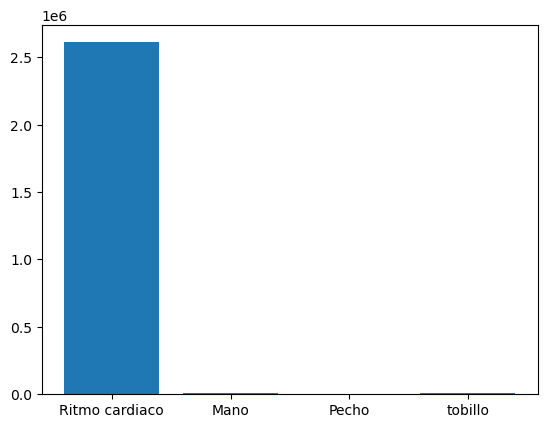

In [24]:
import matplotlib.pyplot as plt

# Datos
x = ["Ritmo cardiaco", "Mano", "Pecho", "tobillo"]
y = [2610265, 13141, 3563, 11749]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
# plt.show() 


Esto significa que tenemos muchos más valores faltantes en el monitor de ritmo cardíaco que en los demás, puesto que en este tenemos millones de vacíos. Mientras que en las manos y tobillo solo tenemos decenas de miles, y en el pecho solo unos cuantos miles. 

Si la proporción de valores faltantes en el heart rate monitor es demasiado alta, podríamos tener que eliminar la característica porque, si los reemplazamos, terminaremos muchas veces con el mismo valor (e.g. la media)

In [26]:
import pandas as pd

clases = ["Ritmo cardiaco", "Mano", "Pecho", "tobillo"]
faltantes = [2610265, 13141, 3563, 11749]
total = 2872533

ratios = [cantidad / total for cantidad in faltantes]
porcentajes = [ratio * 100 for ratio in ratios]

df = pd.DataFrame({
    'clase': clases,
    'cantidad de faltantes': faltantes,
    'ratio de faltantes': ratios,
    'porcentaje de faltantes': porcentajes
})

df

,clase,cantidad de faltantes,ratio de faltantes,porcentaje de faltantes
0,Ritmo cardiaco,2610265,0.909,90.870
1,Mano,13141,0.005,0.457
2,Pecho,3563,0.001,0.124
3,tobillo,11749,0.004,0.409


Podemos observar que 90% de los valores de ritmo cardíaco están vacíos, mentras que para la mano, el pecho y el tobillo, menos de un 1% de los valores son vacíos. Esto indica que, es posible, que un error haya ocurrido con el monitor de ritmo cardíaco o que la frecuencia de muestreo sea mucho menor. 

Si la frecuencia de muestro es menor, podríamos aplicar técnicas como el **forward propagation**, **interpolation**, o diréctamente **convolución**.  

## 2.1. Heart Rate Monitor

Para determinar esto, nos vamos a la documentación. 
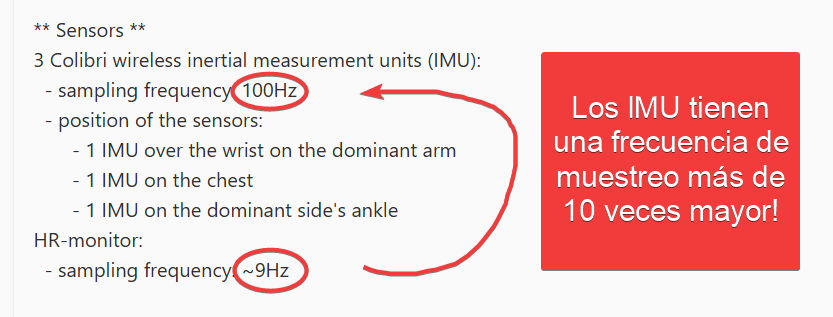


En ella notamos que el heart rate monitor tiene una frecuencia de muestreo de tan solo 9htz, mientras que los IMU tienen una de 100htz. Esto explica la razón detrás de que haya tantos valores faltantes: está tomando 10 veces menos mediciones. Esto es interesante porque significa que podríamos aplicar una de las técnicas mencionadas anteriormente (f. prop., interpolation, o convolution), en lugar de eliminar la columna entera.

Entonces podemos 

In [28]:
pamap_data.head()

,timestamp,activityID,heart_rate_bpm,IMU_Hand_temperature,IMU_Hand_acceleration_16g_x,IMU_Hand_acceleration_16g_y,IMU_Hand_acceleration_16g_z,IMU_Hand_acceleration_6g_x,IMU_Hand_acceleration_6g_y,IMU_Hand_acceleration_6g_z,...,IMU_Ankle_gyroscope_y,IMU_Ankle_gyroscope_z,IMU_Ankle_magnetometer_x,IMU_Ankle_magnetometer_y,IMU_Ankle_magnetometer_z,IMU_Ankle_orientation_1,IMU_Ankle_orientation_2,IMU_Ankle_orientation_3,IMU_Ankle_orientation_4,subject_id
0,8.380,0,104.000,30.000,2.372,8.601,3.510,2.440,8.762,3.355,...,0.009,-0.018,-61.189,-38.960,-58.144,1.000,0.000,0.000,0.000,subject101
1,8.390,0,NaN,30.000,2.188,8.566,3.662,2.395,8.551,3.642,...,-0.005,0.000,-59.848,-38.892,-58.525,1.000,0.000,0.000,0.000,subject101
2,8.400,0,NaN,30.000,2.374,8.601,3.549,2.305,8.536,3.733,...,0.000,0.022,-60.736,-39.414,-58.400,1.000,0.000,0.000,0.000,subject101
3,8.410,0,NaN,30.000,2.075,8.529,3.660,2.335,8.536,3.733,...,-0.020,0.011,-60.409,-38.764,-58.396,1.000,0.000,0.000,0.000,subject101
4,8.420,0,NaN,30.000,2.229,8.831,3.700,2.231,8.597,3.763,...,-0.014,-0.003,-61.520,-39.388,-58.269,1.000,0.000,0.000,0.000,subject101


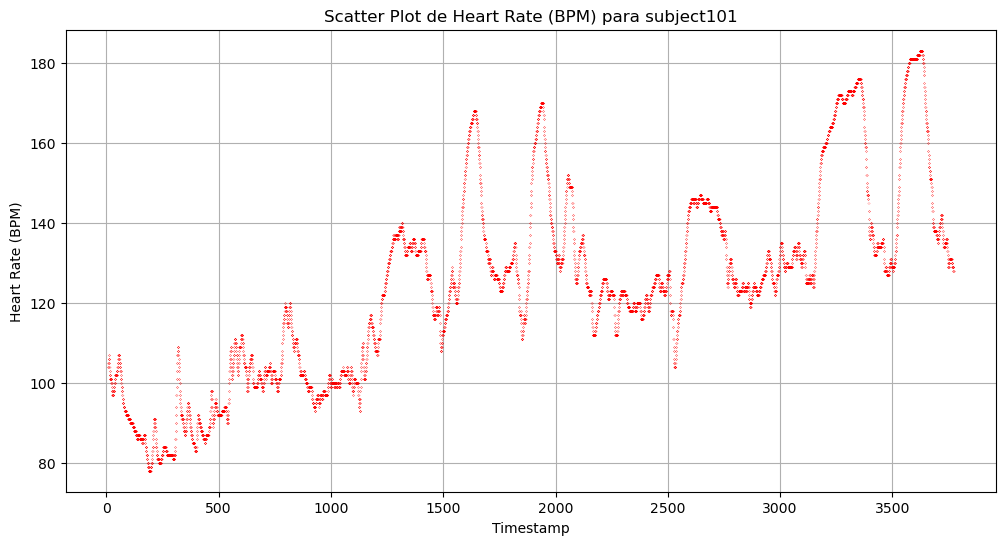

In [30]:
# Filtrar el DataFrame para subject101
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"]

# Extraer timestamp y heart_rate_bpm
timestamps = subject101_data["timestamp"]
heart_rate = subject101_data["heart_rate_bpm"]

plt.figure(figsize=(12, 6))
# Disminuimos el tamaño de cada punto con markersize=3 (ajusta el valor según necesites)
plt.plot(timestamps, heart_rate, marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Scatter Plot de Heart Rate (BPM) para subject101")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()


Observando la curva de heart rate monitor para un sujeto, notamos que los valores faltantes parecen ser aleatorios y también que están en medio de valores existentes. 

Entonces, si queremos usar una técnica como f.fill, tenemos que revisar de qué tamaño son los huecos: si los huecos son muy grandes, forward fill nos dará línes rectas horizontales las cuales no representan la verdadera naturaleza de la serie de tiempo

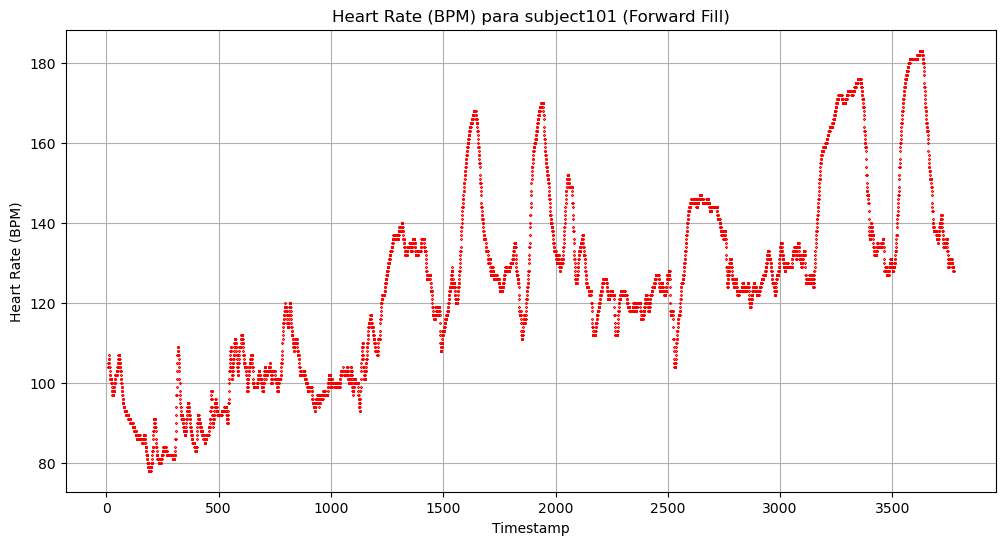

In [32]:
# Aseguramos una copia para evitar advertencias de pandas
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"].copy()

# Aplicar forward fill a la columna de heart_rate_bpm
subject101_data["heart_rate_bpm"] = subject101_data["heart_rate_bpm"].ffill()

# Crear un scatter plot usando .plot() con forward fill aplicado
plt.figure(figsize=(12, 6))
plt.plot(subject101_data["timestamp"], subject101_data["heart_rate_bpm"],
         marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Heart Rate (BPM) para subject101 (Forward Fill)")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()


Forard fill nos permite preservar la estructura de las curvas. Esto preserva de mejor manera las características de la curva.

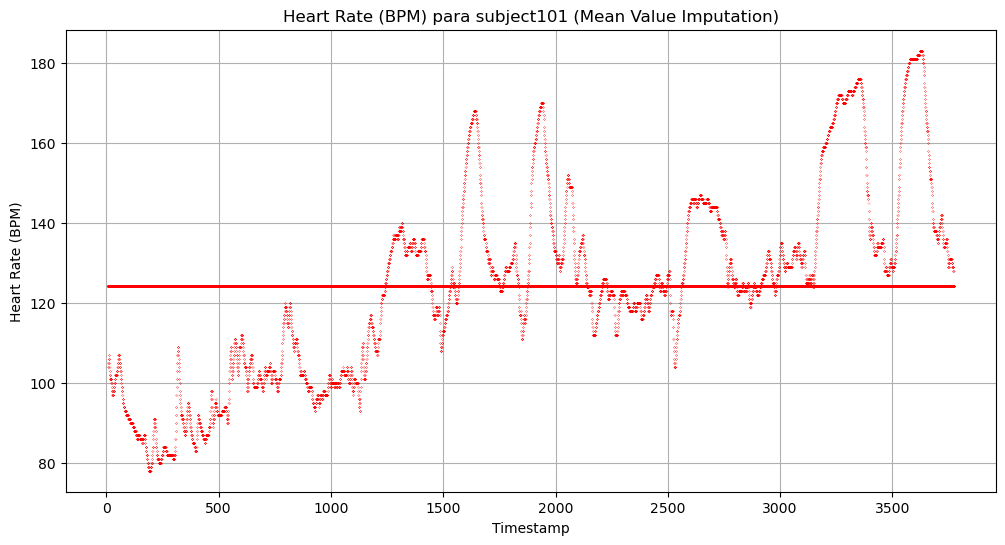

In [36]:
# Aseguramos una copia para evitar advertencias de pandas
subject101_data = pamap_data[pamap_data["subject_id"] == "subject101"].copy()

# Aplicar imputación por la media a la columna de heart_rate_bpm
subject101_data["heart_rate_bpm"] = subject101_data["heart_rate_bpm"].fillna(subject101_data["heart_rate_bpm"].mean())

# Crear un scatter plot usando .plot() con imputación por la media aplicada
plt.figure(figsize=(12, 6))
plt.plot(subject101_data["timestamp"], subject101_data["heart_rate_bpm"],
         marker='.', linestyle='None', color='red', markersize=0.1)
plt.title("Heart Rate (BPM) para subject101 (Mean Value Imputation)")
plt.xlabel("Timestamp")
plt.ylabel("Heart Rate (BPM)")
plt.grid(True)
plt.show()


En cambio, mean value imputation en este contexto altera la curva geenrando una línea horizontal que no es propia del fenómeno que se intenta modelar. Esto puede dificultar la extracción de características como (por decir una) area bajo la curva, porque en algunas secciones el área será muy diferente a la que debería (por ejemplo en todo el intervalo [0, 1000] el valor es mucho mayor al que debería ser. 

Por todo lo mencionado anteriormente, se decide como la técnica a utilizar para tratar los valores faltantes del sensor Heart Rate Monitor como imputación con Fill Forward. A continuación se realiza el cambio para todos los ejemplos: 

In [44]:
deep_copy_pamap2 = pamap_data.copy()

deep_copy_pamap2["heart_rate_bpm"] = (
    deep_copy_pamap2.groupby("subject_id")["heart_rate_bpm"]
    .ffill()
    .bfill()
)

pamap_hm_fixed = deep_copy_pamap2.copy()

pamap_hm_fixed.shape

(2872533, 55)

In [46]:
pamap_hm_fixed.isnull().sum()

timestamp                           0
activityID                          0
heart_rate_bpm                      0
IMU_Hand_temperature            13141
IMU_Hand_acceleration_16g_x     13141
IMU_Hand_acceleration_16g_y     13141
IMU_Hand_acceleration_16g_z     13141
IMU_Hand_acceleration_6g_x      13141
IMU_Hand_acceleration_6g_y      13141
IMU_Hand_acceleration_6g_z      13141
IMU_Hand_gyroscope_x            13141
IMU_Hand_gyroscope_y            13141
IMU_Hand_gyroscope_z            13141
IMU_Hand_magnetometer_x         13141
IMU_Hand_magnetometer_y         13141
IMU_Hand_magnetometer_z         13141
IMU_Hand_orientation_1          13141
IMU_Hand_orientation_2          13141
IMU_Hand_orientation_3          13141
IMU_Hand_orientation_4          13141
IMU_Chest_temperature            3563
IMU_Chest_acceleration_16g_x     3563
IMU_Chest_acceleration_16g_y     3563
IMU_Chest_acceleration_16g_z     3563
IMU_Chest_acceleration_6g_x      3563
IMU_Chest_acceleration_6g_y      3563
IMU_Chest_ac

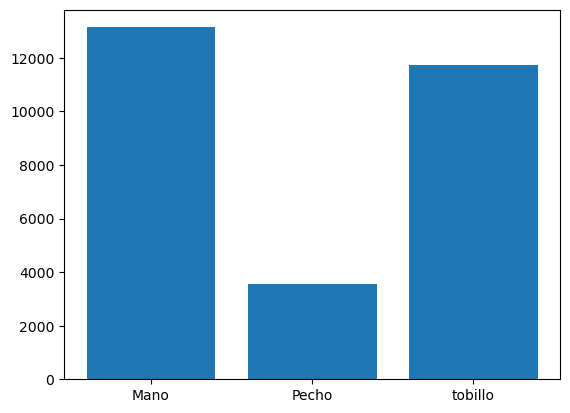

In [49]:
import matplotlib.pyplot as plt

# Datos
x = [ "Mano", "Pecho", "tobillo"]
y = [ 13141, 3563, 11749]

# Gráfico de barras
fig, ax = plt.subplots()
ax.bar(x = x, height = y)
plt.show() 


## 2.2. Mano